In [31]:
import json
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def connect_to_db():
    connection = psycopg2.connect(user = 'postgres',
                                  password = 'root',
                                  host = 'localhost',
                                  port = 5432,
                                  database = 'employee_db')
    return connection

connection = connect_to_db()
department_df = pd.read_sql_query("select * from employees.department", connection)

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\493610779.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department_df = pd.read_sql_query("select * from employees.department", connection)


In [32]:
null_values = department_df.isnull().sum()
print(null_values)

id           0
dept_name    0
dtype: int64


In [33]:
department_df.head()

,id,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [34]:
department_employee_df = pd.read_sql_query("select * from employees.department_employee", connection)
department_employee_df.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\2275014819.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department_employee_df = pd.read_sql_query("select * from employees.department_employee", connection)


,employee_id,department_id,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [35]:
null_values = department_employee_df.isnull().sum()
print(null_values)

employee_id      0
department_id    0
from_date        0
to_date          0
dtype: int64


In [36]:
department_manager_df = pd.read_sql_query("select * from employees.department_manager", connection)
department_manager_df.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\2054593889.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  department_manager_df = pd.read_sql_query("select * from employees.department_manager", connection)


,employee_id,department_id,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,9999-01-01
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,9999-01-01
4,110183,d003,1985-01-01,1992-03-21


In [37]:
null_values = department_manager_df.isnull().sum()
print(null_values)

employee_id      0
department_id    0
from_date        0
to_date          0
dtype: int64


In [38]:
employee_df = pd.read_sql_query("select * from employees.employee", connection)
employee_df.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\3717805264.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employee_df = pd.read_sql_query("select * from employees.employee", connection)


,id,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [39]:
null_values = employee_df.isnull().sum()
print(null_values)

id            0
birth_date    0
first_name    0
last_name     0
gender        0
hire_date     0
dtype: int64


In [40]:
salary_df = pd.read_sql_query("select * from employees.salary", connection)
salary_df.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\2691375779.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query("select * from employees.salary", connection)


,employee_id,amount,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [41]:
null_values = salary_df.isnull().sum()
print(null_values)

employee_id    0
amount         0
from_date      0
to_date        0
dtype: int64


In [42]:
title_df = pd.read_sql_query("select * from employees.title", connection)
title_df.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\1611226361.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  title_df = pd.read_sql_query("select * from employees.title", connection)


,employee_id,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [43]:
null_values = title_df.isnull().sum()
print(null_values)

employee_id    0
title          0
from_date      0
to_date        0
dtype: int64


# Which department has the highest average salary of active employees ? Give some plots to show the avg salary department-wise.

The department with the highest average salary is: Sales


C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\991640133.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_info_all_departments = pd.read_sql_query(query, connection)


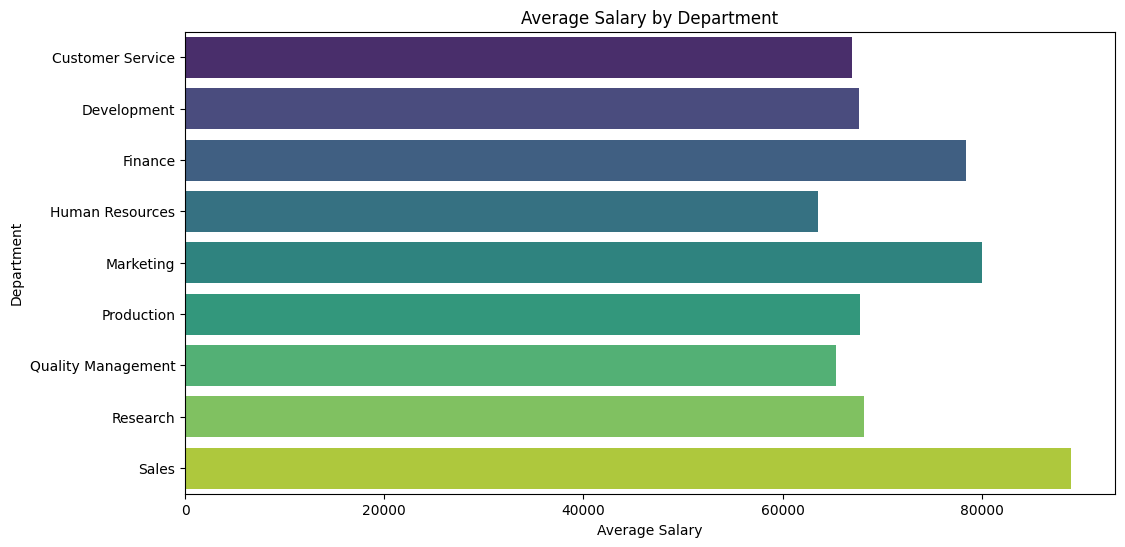

In [44]:
def department_wise_avg_salary():
    connection = connect_to_db()

    query = """SELECT d.dept_name, AVG(s.amount) AS avg_salary
               FROM employees.department_employee de
               JOIN employees.salary s ON s.employee_id = de.employee_id
               JOIN employees.department d ON d.id = de.department_id
               WHERE date_part('year', s.to_date) = 9999
               GROUP BY d.dept_name"""

    salary_info_all_departments = pd.read_sql_query(query, connection)

    connection.close()

    max_salary_row = salary_info_all_departments.loc[salary_info_all_departments['avg_salary'].idxmax()]

    return salary_info_all_departments, max_salary_row

def plot_avg_salary_by_department(salary_info_all_departments):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='avg_salary', y='dept_name', data=salary_info_all_departments, palette='viridis')
    plt.title('Average Salary by Department')
    plt.xlabel('Average Salary')
    plt.ylabel('Department')
    plt.show()

salary_info_all_departments, max_salary_row = department_wise_avg_salary()

highest_avg_salary_department = max_salary_row['dept_name']
print(f"The department with the highest average salary is: {highest_avg_salary_department}")

plot_avg_salary_by_department(salary_info_all_departments)

 # Which title has the highest avg salary? Give some plots to show the avg salary title-wise.

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\1949444736.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_info_all_titles = pd.read_sql_query(query, connection)


The title with the highest average salary is: Senior Staff


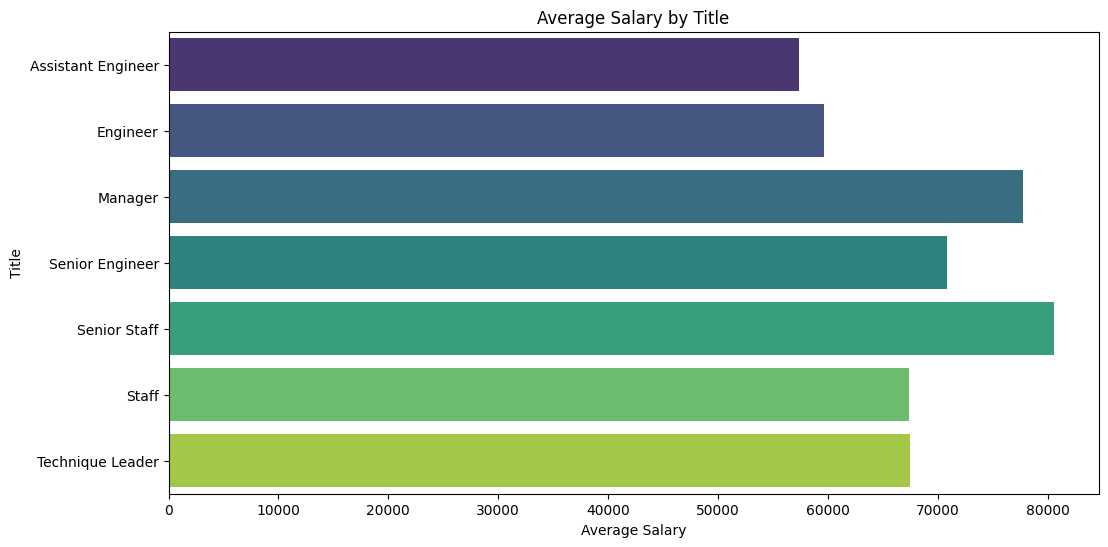

In [45]:
def title_wise_avg_salary():
    connection = connect_to_db()

    query = """SELECT te.title, AVG(s.amount) AS avg_salary
               FROM employees.employee e
               LEFT JOIN employees.title te ON te.employee_id = e.id
               LEFT JOIN employees.salary s ON s.employee_id = e.id
               WHERE date_part('year', s.to_date) = 9999
                 AND date_part('year', te.to_date) = 9999
               GROUP BY te.title"""

    salary_info_all_titles = pd.read_sql_query(query, connection)

    connection.close()

    max_salary_row = salary_info_all_titles.loc[salary_info_all_titles['avg_salary'].idxmax()]

    return salary_info_all_titles, max_salary_row

def plot_avg_salary_by_title(salary_info_all_titles):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='avg_salary', y='title', data=salary_info_all_titles, palette='viridis')
    plt.title('Average Salary by Title')
    plt.xlabel('Average Salary')
    plt.ylabel('Title')
    plt.show()

salary_info_all_titles, max_salary_row = title_wise_avg_salary()

highest_avg_salary_title = max_salary_row['title']
print(f"The title with the highest average salary is: {highest_avg_salary_title}")

plot_avg_salary_by_title(salary_info_all_titles)

# Distribution of salary across titles.

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\2318846592.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_info_all_titles = pd.read_sql_query(query, connection)


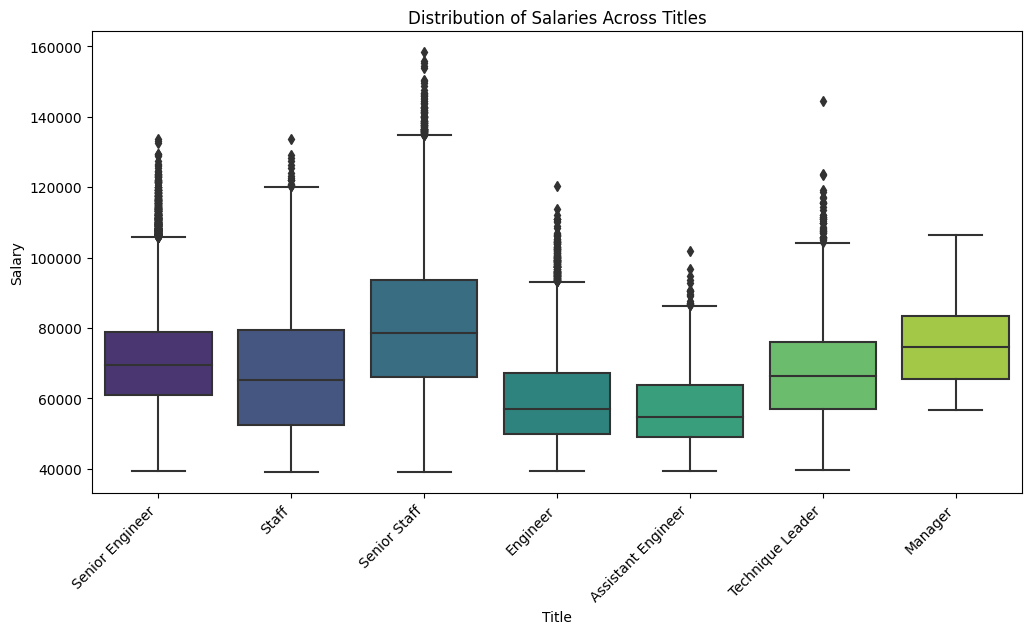

In [46]:
def salary_distribution_across_titles():
    connection = connect_to_db()

    query = """SELECT te.title, s.amount
               FROM employees.employee e
               LEFT JOIN employees.title te ON te.employee_id = e.id
               LEFT JOIN employees.salary s ON s.employee_id = e.id
               WHERE date_part('year', s.to_date) = 9999
                 AND date_part('year', te.to_date) = 9999"""

    salary_info_all_titles = pd.read_sql_query(query, connection)

    connection.close()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='title', y='amount', data=salary_info_all_titles, palette='viridis')
    plt.title('Distribution of Salaries Across Titles')
    plt.xlabel('Title')
    plt.ylabel('Salary')
    plt.xticks(rotation=45, ha='right') 
    plt.show()

salary_distribution_across_titles()

# Distribution of salary across departments.

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\2090942279.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_info_all_departments = pd.read_sql_query(query, connection)


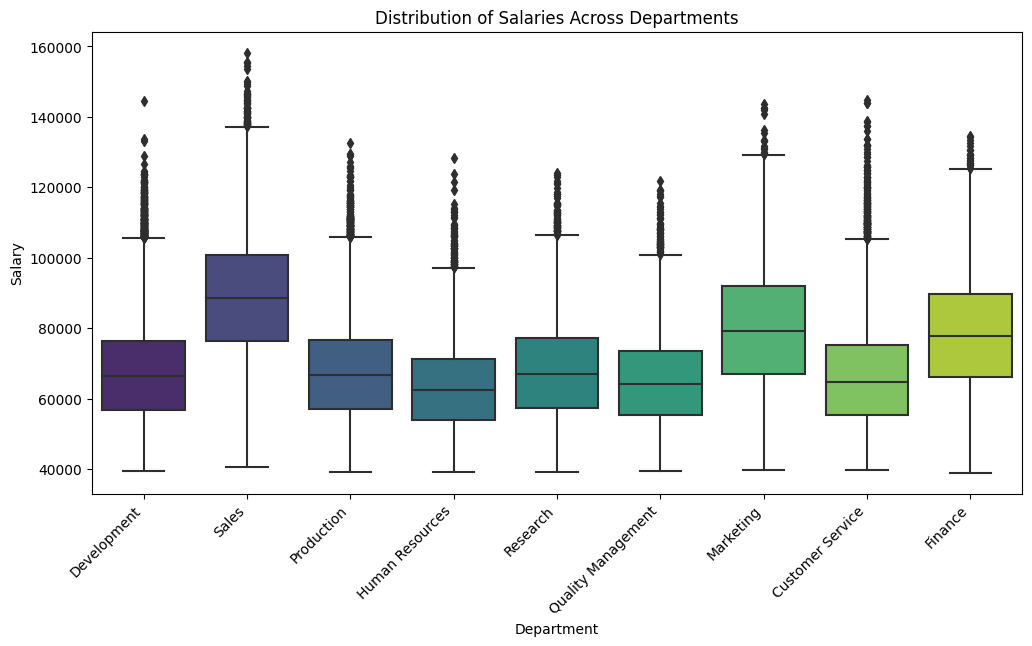

In [47]:
def salary_distribution_across_departments():
    connection = connect_to_db()

    query = """SELECT d.dept_name, s.amount
               FROM employees.department_employee de
               LEFT JOIN employees.salary s ON s.employee_id = de.employee_id
               LEFT JOIN employees.department d ON d.id = de.department_id
               WHERE date_part('year', s.to_date) = 9999"""

    salary_info_all_departments = pd.read_sql_query(query, connection)

    connection.close()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='dept_name', y='amount', data=salary_info_all_departments, palette='viridis')
    plt.title('Distribution of Salaries Across Departments')
    plt.xlabel('Department')
    plt.ylabel('Salary')
    plt.xticks(rotation=45, ha='right')
    plt.show()

salary_distribution_across_departments()

# How many active managers in each department. Is there any department with no manager?

In [48]:
def active_managers_in_each_department():
    connection = connect_to_db()

    query = """SELECT
                    d.dept_name,
                    COUNT(dm.employee_id) AS active_managers_count
                FROM
                    employees.department d
                LEFT JOIN
                    employees.department_manager dm ON dm.department_id = d.id
                WHERE
                    date_part('year', dm.to_date) = 9999
                GROUP BY
                    d.dept_name;"""

    active_managers_info = pd.read_sql_query(query, connection)

    connection.close()

    return active_managers_info

active_managers_info = active_managers_in_each_department()

print(active_managers_info)

departments_with_no_managers = active_managers_info[active_managers_info['active_managers_count'] == 0]

if not departments_with_no_managers.empty:
    print("Departments with no managers:")
    print(departments_with_no_managers)
else:
    print("All departments have at least one active manager.")

            dept_name  active_managers_count
0    Customer Service                      1
1         Development                      1
2             Finance                      1
3     Human Resources                      1
4           Marketing                      1
5          Production                      1
6  Quality Management                      1
7            Research                      1
8               Sales                      1
All departments have at least one active manager.


C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\3415468899.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  active_managers_info = pd.read_sql_query(query, connection)


# Composition of titles department-wise. Appropriate plots.

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\3966834672.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  titles_composition_info = pd.read_sql_query(query, connection)


             dept_name               title  employee_count
0     Customer Service  Assistant Engineer              68
1     Customer Service            Engineer             627
2     Customer Service             Manager               1
3     Customer Service     Senior Engineer            1790
4     Customer Service        Senior Staff           12349
5     Customer Service               Staff            3902
6     Customer Service    Technique Leader             241
7          Development  Assistant Engineer            1833
8          Development            Engineer           15677
9          Development             Manager               1
10         Development     Senior Engineer           43364
11         Development        Senior Staff            1085
12         Development               Staff             315
13         Development    Technique Leader            6117
14             Finance             Manager               1
15             Finance        Senior Staff           106

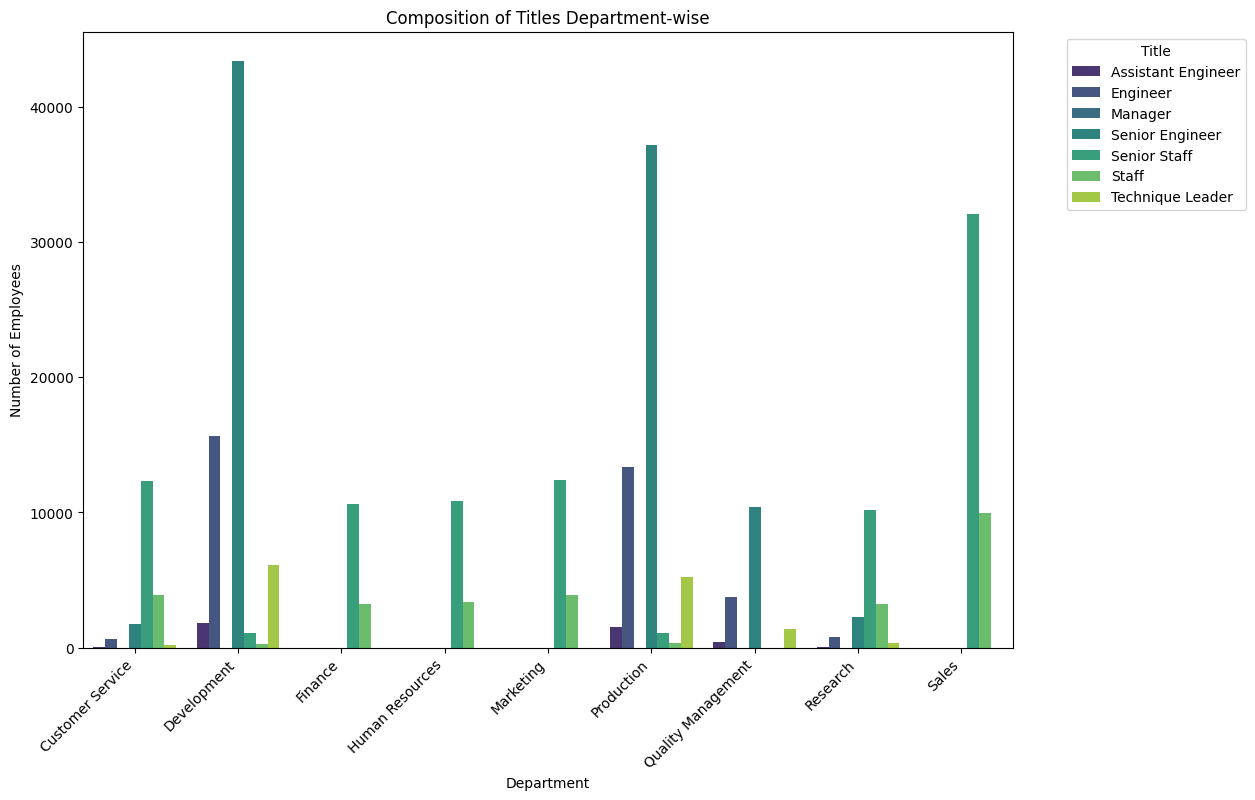

In [49]:
def titles_composition_department_wise():
    connection = connect_to_db()

    query = """SELECT
                    d.dept_name,
                    te.title,
                    COUNT(e.id) AS employee_count
                FROM
                    employees.employee e
                LEFT JOIN
                    employees.title te ON te.employee_id = e.id
                LEFT JOIN
                    employees.department_employee de ON de.employee_id = e.id
                LEFT JOIN
                    employees.department d ON d.id = de.department_id
                WHERE
                    date_part('year', te.to_date) = 9999
                GROUP BY
                    d.dept_name, te.title;"""

    titles_composition_info = pd.read_sql_query(query, connection)

    connection.close()

    return titles_composition_info

def plot_titles_composition(titles_composition_info):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='dept_name', y='employee_count', hue='title', data=titles_composition_info, palette='viridis')
    plt.title('Composition of Titles Department-wise')
    plt.xlabel('Department')
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend(title='Title', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

titles_composition_info = titles_composition_department_wise()

print(titles_composition_info)

plot_titles_composition(titles_composition_info)

# Composition of departments title-wise. Appropriate plots.

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\2646986165.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  departments_composition_info = pd.read_sql_query(query, connection)


                 title           dept_name  employee_count
0   Assistant Engineer    Customer Service              68
1   Assistant Engineer         Development            1833
2   Assistant Engineer          Production            1542
3   Assistant Engineer  Quality Management             433
4   Assistant Engineer            Research              77
5             Engineer    Customer Service             627
6             Engineer         Development           15677
7             Engineer          Production           13325
8             Engineer  Quality Management            3744
9             Engineer            Research             830
10             Manager    Customer Service               1
11             Manager         Development               1
12             Manager             Finance               1
13             Manager     Human Resources               1
14             Manager           Marketing               1
15             Manager          Production              

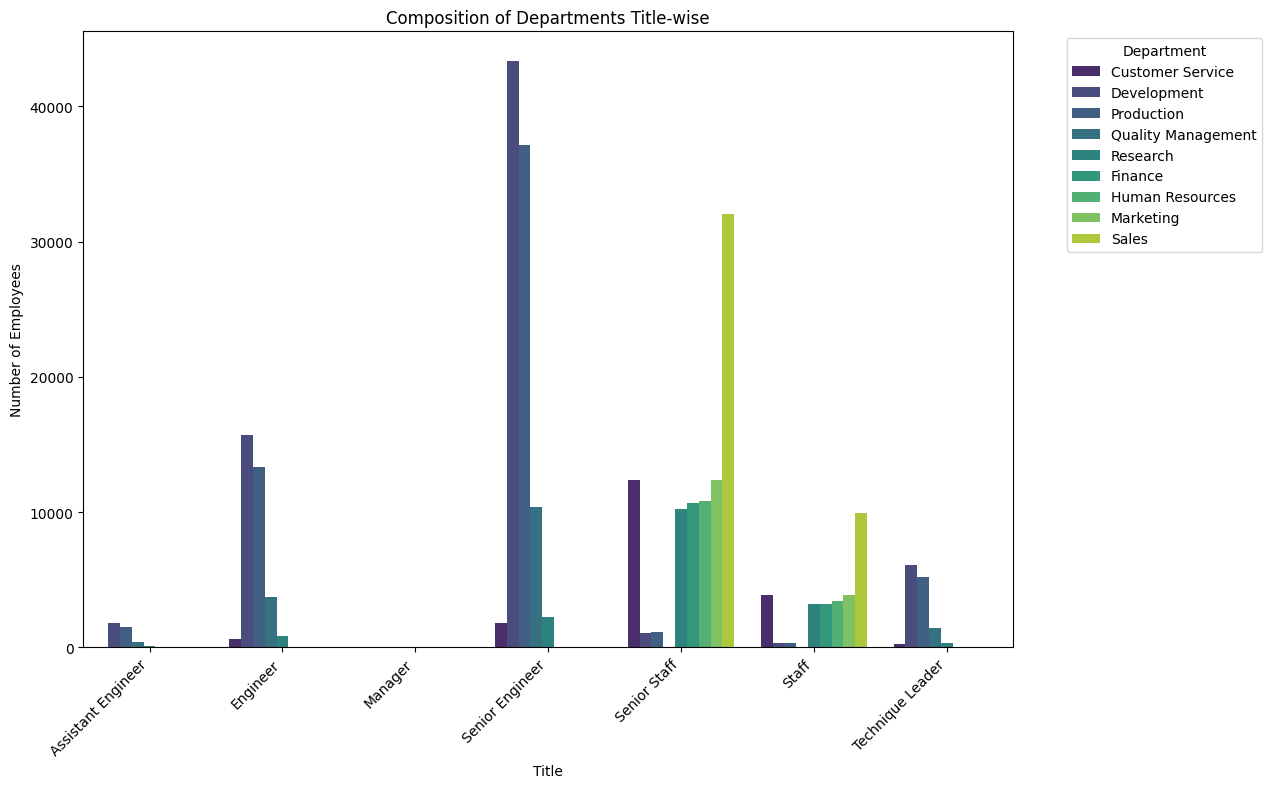

In [50]:
def departments_composition_title_wise():
    connection = connect_to_db()

    query = """SELECT
                    te.title,
                    d.dept_name,
                    COUNT(e.id) AS employee_count
                FROM
                    employees.employee e
                LEFT JOIN
                    employees.title te ON te.employee_id = e.id
                LEFT JOIN
                    employees.department_employee de ON de.employee_id = e.id
                LEFT JOIN
                    employees.department d ON d.id = de.department_id
                WHERE
                    date_part('year', te.to_date) = 9999
                GROUP BY
                    te.title, d.dept_name;"""

    departments_composition_info = pd.read_sql_query(query, connection)

    connection.close()

    return departments_composition_info

def plot_departments_composition(departments_composition_info):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='title', y='employee_count', hue='dept_name', data=departments_composition_info, palette='viridis')
    plt.title('Composition of Departments Title-wise')
    plt.xlabel('Title')
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

departments_composition_info = departments_composition_title_wise()

print(departments_composition_info)

plot_departments_composition(departments_composition_info)

# Salaries of active department managers. Which department's manager who is active earns the most?

In [51]:
def active_department_managers_salaries():
    connection = connect_to_db()

    query = """SELECT
                    d.dept_name,
                    dm.employee_id,
                    e.first_name,
                    e.last_name,
                    s.amount
                FROM
                    employees.department_manager dm
                JOIN
                    employees.employee e ON e.id = dm.employee_id
                JOIN
                    employees.salary s ON s.employee_id = dm.employee_id
                JOIN
                    employees.department d ON d.id = dm.department_id
                WHERE
                    date_part('year', s.to_date) = 9999
                ORDER BY
                    s.amount DESC;"""

    managers_salaries_info = pd.read_sql_query(query, connection)

    connection.close()

    return managers_salaries_info

def highest_earning_department_manager(managers_salaries_info):
    if not managers_salaries_info.empty:
        highest_earning_manager = managers_salaries_info.iloc[0]
        return highest_earning_manager
    else:
        return None

managers_salaries_info = active_department_managers_salaries()

print(managers_salaries_info)

highest_earning_manager = highest_earning_department_manager(managers_salaries_info)

if highest_earning_manager is not None:
    print(f"The manager in the {highest_earning_manager['dept_name']} department who is active earns the most.")
    print(f"Manager: {highest_earning_manager['first_name']} {highest_earning_manager['last_name']}")
    print(f"Salary: {highest_earning_manager['amount']}")
else:
    print("No active department managers found.")

             dept_name  employee_id   first_name     last_name  amount
0            Marketing       110022    Margareta    Markovitch  108407
1            Marketing       110039     Vishwani      Minakawa  106491
2             Research       111400         Arie       Staelin  103244
3                Sales       111133        Hauke         Zhang  101987
4                Sales       111035  Przemyslawa     Kaelbling   95873
5   Quality Management       110725    Peternela       Onuegbe   93193
6              Finance       110085         Ebru         Alpin   88443
7              Finance       110114        Isamu    Legleitner   83457
8             Research       111534       Hilary        Kambil   79393
9      Human Resources       110183      Shirish  Ossenbruggen   79229
10  Quality Management       110800       Sanjoy       Quadeer   77626
11          Production       110344       Rosine         Cools   75121
12         Development       110567         Leon      DasSarma   74510
13    

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\1261025408.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  managers_salaries_info = pd.read_sql_query(query, connection)


C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\1261025408.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  managers_salaries_info = pd.read_sql_query(query, connection)


             dept_name  employee_id   first_name     last_name  amount
0            Marketing       110022    Margareta    Markovitch  108407
1            Marketing       110039     Vishwani      Minakawa  106491
2             Research       111400         Arie       Staelin  103244
3                Sales       111133        Hauke         Zhang  101987
4                Sales       111035  Przemyslawa     Kaelbling   95873
5   Quality Management       110725    Peternela       Onuegbe   93193
6              Finance       110085         Ebru         Alpin   88443
7              Finance       110114        Isamu    Legleitner   83457
8             Research       111534       Hilary        Kambil   79393
9      Human Resources       110183      Shirish  Ossenbruggen   79229
10  Quality Management       110800       Sanjoy       Quadeer   77626
11          Production       110344       Rosine         Cools   75121
12         Development       110567         Leon      DasSarma   74510
13    

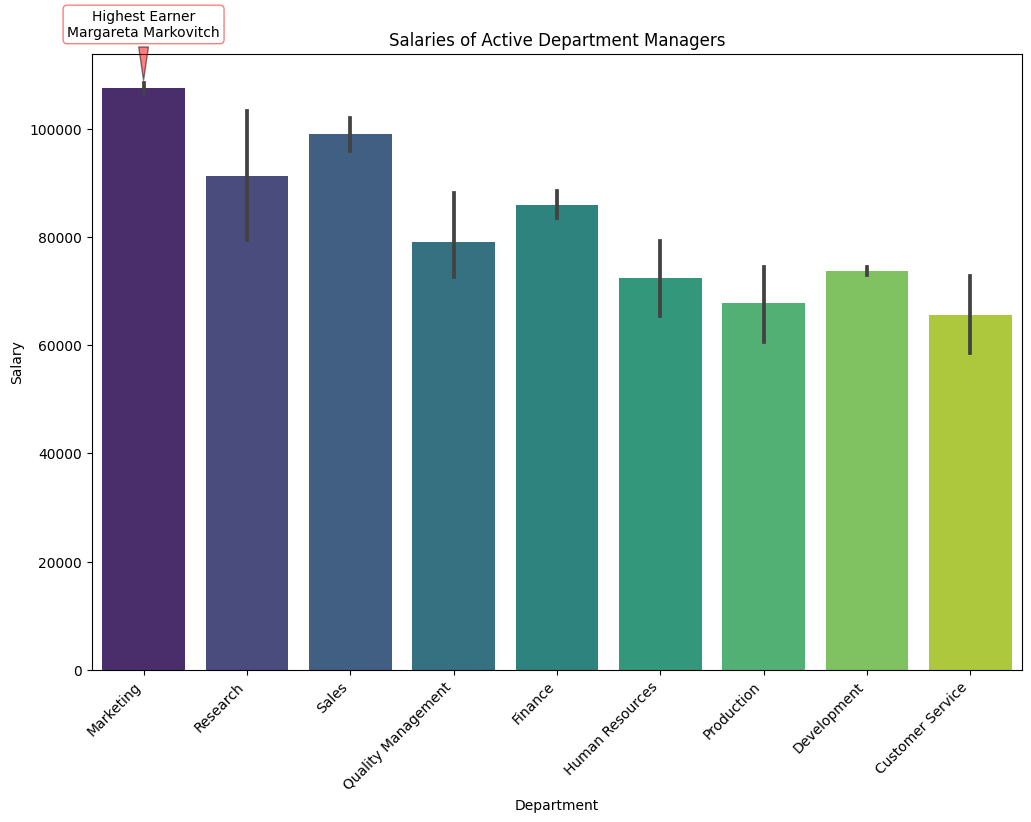

In [52]:
def highest_earning_department_manager(managers_salaries_info):
    if not managers_salaries_info.empty:
        highest_earning_manager = managers_salaries_info.iloc[0]
        return highest_earning_manager
    else:
        return None

def plot_salaries_and_highlight_highest(manager_salaries_info):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='dept_name', y='amount', data=manager_salaries_info, palette='viridis')
    plt.title('Salaries of Active Department Managers')
    plt.xlabel('Department')
    plt.ylabel('Salary')
    plt.xticks(rotation=45, ha='right') 

    if not manager_salaries_info.empty:
        highest_earning_manager = manager_salaries_info.iloc[0]
        plt.annotate(f'Highest Earner\n{highest_earning_manager["first_name"]} {highest_earning_manager["last_name"]}',
                     xy=(0, highest_earning_manager['amount']),
                     xytext=(0, highest_earning_manager['amount'] * 1.1),
                     ha='center', va='center',
                     arrowprops=dict(facecolor='red', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
                     bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white', alpha=0.5))

    plt.show()

managers_salaries_info = active_department_managers_salaries()

print(managers_salaries_info)

highest_earning_manager = highest_earning_department_manager(managers_salaries_info)

plot_salaries_and_highlight_highest(managers_salaries_info)

# What are the titles of active department managers? Are they managers only?

In [53]:
def active_department_managers_titles():
    connection = connect_to_db()

    query = """SELECT
                    e.id,
                    e.first_name,
                    e.last_name,
                    te.title
                FROM
                    employees.employee e
                JOIN
                    employees.title te ON te.employee_id = e.id
                JOIN
                    employees.department_manager dm ON dm.employee_id = e.id
                WHERE
                    date_part('year', te.to_date) = 9999
                ORDER BY
                    e.id;"""

    managers_titles_info = pd.read_sql_query(query, connection)
    
    connection.close()

    return managers_titles_info

managers_titles_info = active_department_managers_titles()

print(managers_titles_info)

only_managers = managers_titles_info['title'].nunique() == 1 and managers_titles_info['title'].iloc[0] == 'Manager'

if only_managers:
    print("Active department managers have only the title 'Manager'.")
else:
    print("Active department managers have various titles.")

        id   first_name     last_name             title
0   110022    Margareta    Markovitch      Senior Staff
1   110039     Vishwani      Minakawa           Manager
2   110085         Ebru         Alpin      Senior Staff
3   110114        Isamu    Legleitner           Manager
4   110183      Shirish  Ossenbruggen             Staff
5   110228      Karsten       Sigstam           Manager
6   110303    Krassimir       Wegerle  Technique Leader
7   110344       Rosine         Cools  Technique Leader
8   110386         Shem        Kieras  Technique Leader
9   110420        Oscar      Ghazalie           Manager
10  110511     DeForest      Hagimont  Technique Leader
11  110567         Leon      DasSarma           Manager
12  110725    Peternela       Onuegbe  Technique Leader
13  110765       Rutger       Hofmeyr  Technique Leader
14  110800       Sanjoy       Quadeer  Technique Leader
15  110854         Dung         Pesch           Manager
16  111035  Przemyslawa     Kaelbling           

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\1866154067.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  managers_titles_info = pd.read_sql_query(query, connection)


C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\1936990217.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  managers_titles_info = pd.read_sql_query(query, connection)


        id   first_name     last_name             title
0   110022    Margareta    Markovitch      Senior Staff
1   110039     Vishwani      Minakawa           Manager
2   110085         Ebru         Alpin      Senior Staff
3   110114        Isamu    Legleitner           Manager
4   110183      Shirish  Ossenbruggen             Staff
5   110228      Karsten       Sigstam           Manager
6   110303    Krassimir       Wegerle  Technique Leader
7   110344       Rosine         Cools  Technique Leader
8   110386         Shem        Kieras  Technique Leader
9   110420        Oscar      Ghazalie           Manager
10  110511     DeForest      Hagimont  Technique Leader
11  110567         Leon      DasSarma           Manager
12  110725    Peternela       Onuegbe  Technique Leader
13  110765       Rutger       Hofmeyr  Technique Leader
14  110800       Sanjoy       Quadeer  Technique Leader
15  110854         Dung         Pesch           Manager
16  111035  Przemyslawa     Kaelbling           

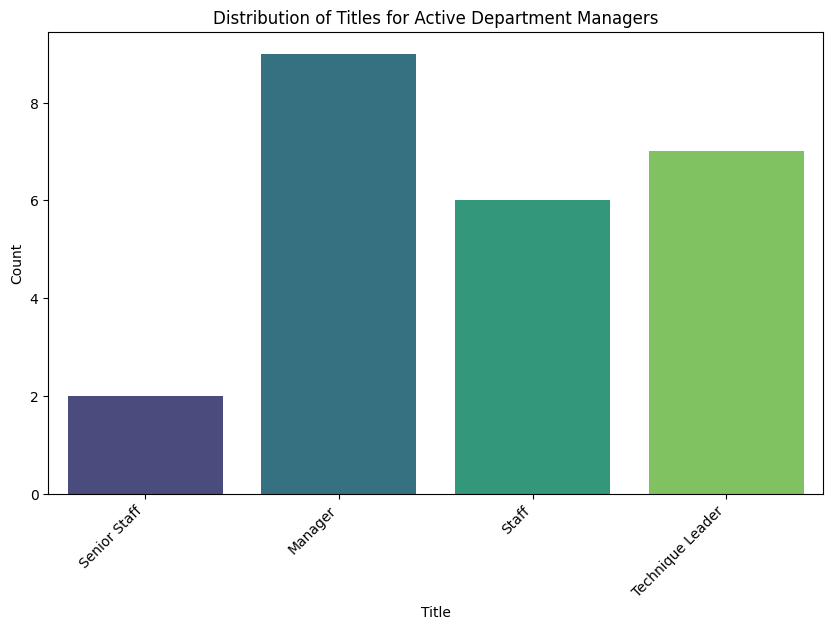

In [54]:
def active_department_managers_titles():
    connection = connect_to_db()

    query = """SELECT
                    e.id,
                    e.first_name,
                    e.last_name,
                    te.title
                FROM
                    employees.employee e
                JOIN
                    employees.title te ON te.employee_id = e.id
                JOIN
                    employees.department_manager dm ON dm.employee_id = e.id
                WHERE
                    date_part('year', te.to_date) = 9999
                ORDER BY
                    e.id;"""

    managers_titles_info = pd.read_sql_query(query, connection)

    connection.close()

    return managers_titles_info

def plot_titles_distribution(titles_info):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='title', data=titles_info, palette='viridis')
    plt.title('Distribution of Titles for Active Department Managers')
    plt.xlabel('Title')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

managers_titles_info = active_department_managers_titles()

print(managers_titles_info)

plot_titles_distribution(managers_titles_info)

# Past history of salaries of managers across department (yearly)

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\1605063483.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salaries_history_info = pd.read_sql_query(query, connection)


     employee_id first_name   last_name         dept_name  salary_year  \
0         110022  Margareta  Markovitch         Marketing       1986.0   
1         110022  Margareta  Markovitch         Marketing       1987.0   
2         110022  Margareta  Markovitch         Marketing       1988.0   
3         110022  Margareta  Markovitch         Marketing       1989.0   
4         110022  Margareta  Markovitch         Marketing       1990.0   
..           ...        ...         ...               ...          ...   
350       111939    Yuchang     Weedman  Customer Service       1998.0   
351       111939    Yuchang     Weedman  Customer Service       1999.0   
352       111939    Yuchang     Weedman  Customer Service       2000.0   
353       111939    Yuchang     Weedman  Customer Service       2001.0   
354       111939    Yuchang     Weedman  Customer Service       2002.0   

     avg_salary  
0       71166.0  
1       71820.0  
2       74590.5  
3       78443.0  
4       81784.0  
.. 

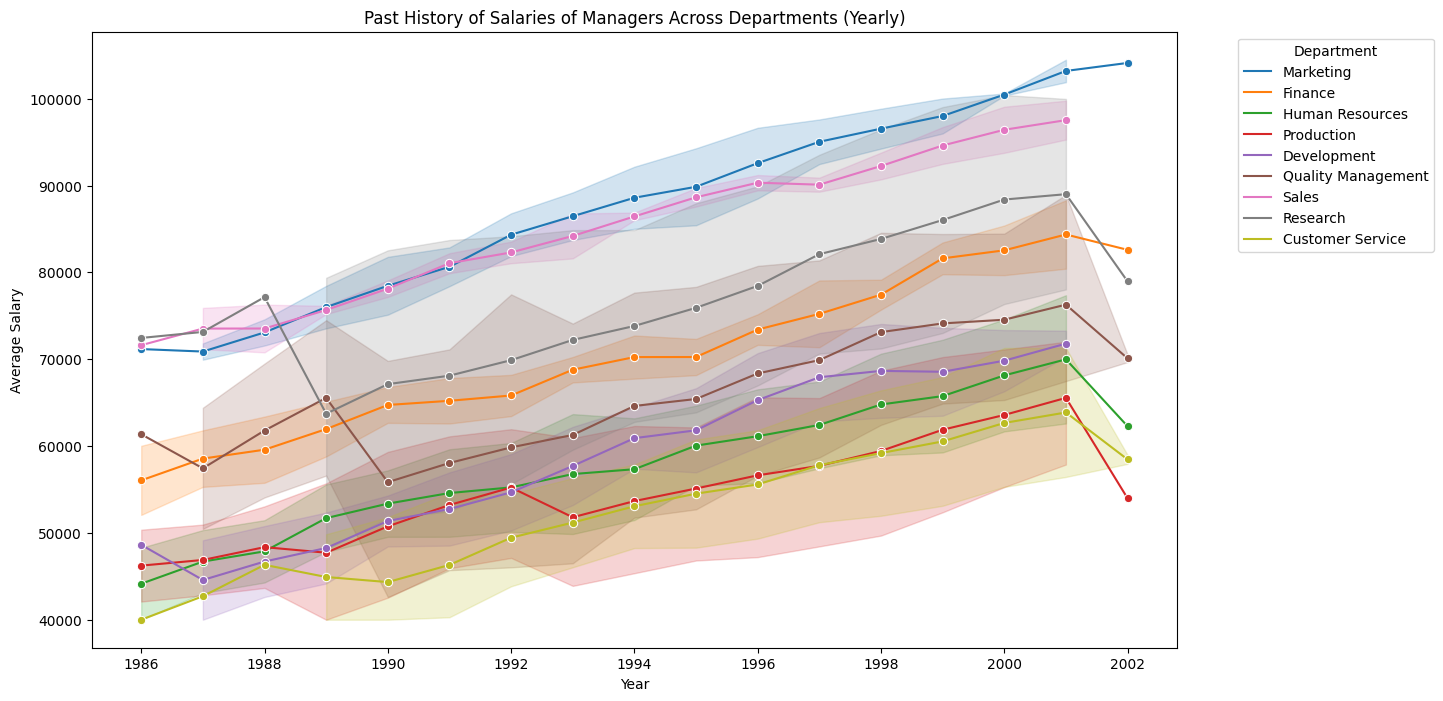

In [55]:
def managers_salaries_history():
    connection = connect_to_db()

    query = """SELECT
                    dm.employee_id,
                    e.first_name,
                    e.last_name,
                    d.dept_name,
                    EXTRACT(YEAR FROM s.to_date) AS salary_year,
                    AVG(s.amount) AS avg_salary
                FROM
                    employees.department_manager dm
                JOIN
                    employees.employee e ON e.id = dm.employee_id
                JOIN
                    employees.salary s ON s.employee_id = dm.employee_id
                JOIN
                    employees.department d ON d.id = dm.department_id
                WHERE
                    date_part('year', s.to_date) != 9999
                GROUP BY
                    dm.employee_id, e.first_name, e.last_name, d.dept_name, salary_year
                ORDER BY
                    dm.employee_id, salary_year;"""

    salaries_history_info = pd.read_sql_query(query, connection)

    connection.close()

    return salaries_history_info

def plot_salaries_history(salaries_history_info):
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='salary_year', y='avg_salary', hue='dept_name', data=salaries_history_info, marker='o')
    plt.title('Past History of Salaries of Managers Across Departments (Yearly)')
    plt.xlabel('Year')
    plt.ylabel('Average Salary')
    plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

salaries_history_info = managers_salaries_history()

print(salaries_history_info)

plot_salaries_history(salaries_history_info)

# Distribution of salaries of active employees working for more than 10 years vs 4 years vs 1 year.

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\1596531575.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salaries_distribution_info = pd.read_sql_query(query, connection)


       amount
0       39012
1       39186
2       39285
3       39346
4       39432
...       ...
96365  153715
96366  154459
96367  155190
96368  155709
96369  158220

[96370 rows x 1 columns]


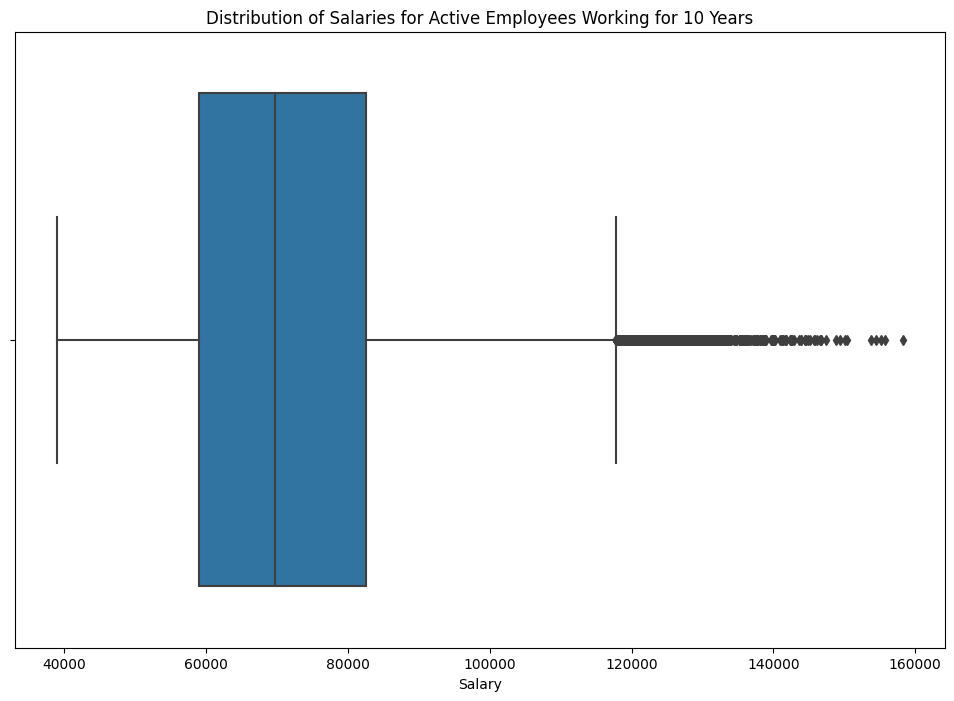

In [56]:
def active_employees_salaries_distribution(years_of_service):
    connection = connect_to_db()

    query = f"""SELECT
                    s.amount
                FROM
                    employees.employee e
                JOIN
                    employees.salary s ON s.employee_id = e.id
                WHERE
                    date_part('year', s.to_date) = 9999
                    AND date_part('year', e.hire_date) <= (EXTRACT(YEAR FROM CURRENT_DATE) - {years_of_service})
                ORDER BY
                    s.amount;"""

    salaries_distribution_info = pd.read_sql_query(query, connection)


    return salaries_distribution_info

def plot_salaries_distribution_box(years_of_service, salaries_distribution_info):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='amount', data=salaries_distribution_info)
    plt.title(f'Distribution of Salaries for Active Employees Working for {years_of_service} Years')
    plt.xlabel('Salary')
    plt.show()

salaries_distribution_10_years = active_employees_salaries_distribution(10)

# Print the result
print(salaries_distribution_10_years)

# box plot
plot_salaries_distribution_box(10, salaries_distribution_10_years)

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\2117481838.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salaries_distribution_info = pd.read_sql_query(query, connection)


       amount
0       39012
1       39186
2       39285
3       39346
4       39432
...       ...
96365  153715
96366  154459
96367  155190
96368  155709
96369  158220

[96370 rows x 1 columns]


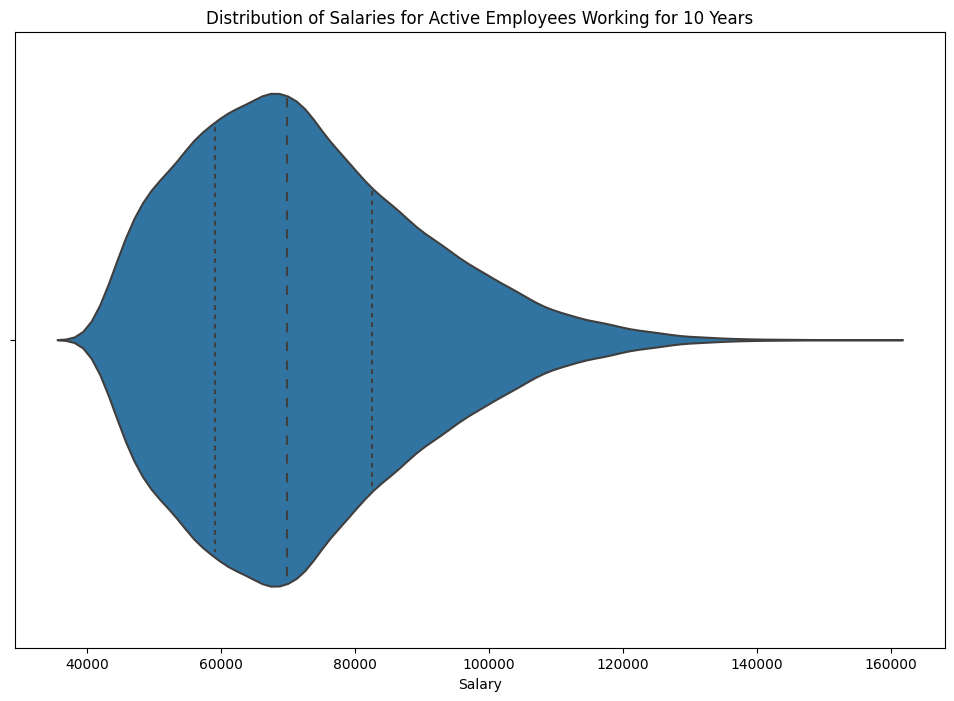

In [57]:
def active_employees_salaries_distribution(years_of_service):
    connection = connect_to_db()

    query = f"""SELECT
                    s.amount
                FROM
                    employees.employee e
                JOIN
                    employees.salary s ON s.employee_id = e.id
                WHERE
                    date_part('year', s.to_date) = 9999
                    AND date_part('year', e.hire_date) <= (EXTRACT(YEAR FROM CURRENT_DATE) - {years_of_service})
                ORDER BY
                    s.amount;"""

    salaries_distribution_info = pd.read_sql_query(query, connection)

    return salaries_distribution_info

def plot_salaries_distribution_violin(years_of_service, salaries_distribution_info):
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='amount', data=salaries_distribution_info, inner='quartile')
    plt.title(f'Distribution of Salaries for Active Employees Working for {years_of_service} Years')
    plt.xlabel('Salary')
    plt.show()

salaries_distribution_10_years = active_employees_salaries_distribution(10)

print(salaries_distribution_10_years)
# violin plot
plot_salaries_distribution_violin(10, salaries_distribution_10_years)

# Average number of years employees work in the company before leaving (title wise).

                title  avg_years_before_leaving
0  Assistant Engineer                  7.646534
1            Engineer                  7.845882
2             Manager                  5.333333
3     Senior Engineer                  9.014986
4        Senior Staff                  9.127251
5               Staff                  7.681512
6    Technique Leader                  7.259021


C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\1512064235.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_years_info = pd.read_sql_query(query, connection)


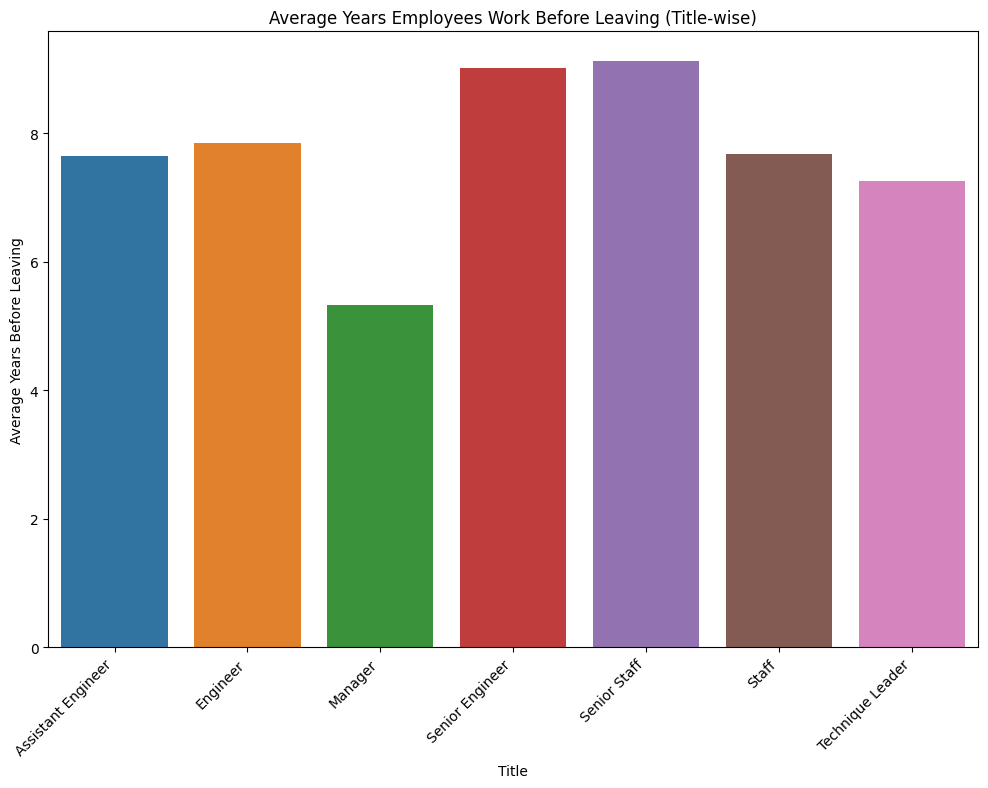

In [58]:
def avg_years_before_leaving_by_title():
    connection = connect_to_db()

    query = """SELECT
                    te.title,
                    AVG(EXTRACT(YEAR FROM te.to_date) - EXTRACT(YEAR FROM e.hire_date)) AS avg_years_before_leaving
                FROM
                    employees.employee e
                LEFT JOIN
                    employees.title te ON te.employee_id = e.id
                WHERE
                    date_part('year', te.to_date) != 9999
                GROUP BY
                    te.title;"""

    avg_years_info = pd.read_sql_query(query, connection)

    # Close the database connection
    connection.close()

    return avg_years_info

def plot_avg_years_before_leaving(avg_years_info):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='title', y='avg_years_before_leaving', data=avg_years_info)
    plt.title('Average Years Employees Work Before Leaving (Title-wise)')
    plt.xlabel('Title')
    plt.ylabel('Average Years Before Leaving')
    plt.xticks(rotation=45, ha='right') 
    plt.show()

avg_years_info = avg_years_before_leaving_by_title()

print(avg_years_info)

plot_avg_years_before_leaving(avg_years_info)

# Average number of years employees work in the company before leaving (Dept wise).

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\3447690667.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_years_info = pd.read_sql_query(query, connection)


            dept_name  avg_years_before_leaving
0    Customer Service                  7.872026
1         Development                  7.927248
2             Finance                  7.846154
3     Human Resources                  7.826024
4           Marketing                  7.847184
5          Production                  7.926690
6  Quality Management                  7.956050
7            Research                  7.876554
8               Sales                  7.851699


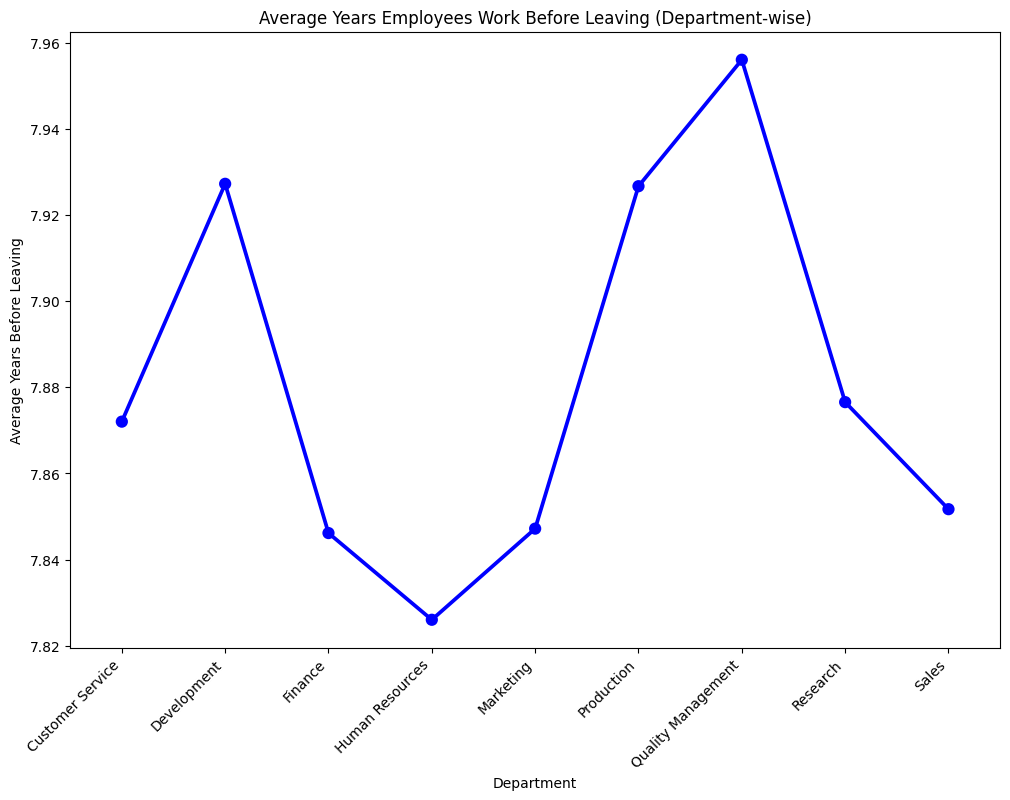

In [59]:
def avg_years_before_leaving_by_department():
    connection = connect_to_db()

    query = """SELECT
                    d.dept_name,
                    AVG(EXTRACT(YEAR FROM te.to_date) - EXTRACT(YEAR FROM e.hire_date)) AS avg_years_before_leaving
                FROM
                    employees.employee e
                LEFT JOIN
                    employees.title te ON te.employee_id = e.id
                LEFT JOIN
                    employees.department_employee de ON de.employee_id = e.id
                LEFT JOIN
                    employees.department d ON d.id = de.department_id
                WHERE
                    date_part('year', te.to_date) != 9999
                GROUP BY
                    d.dept_name;"""

    avg_years_info = pd.read_sql_query(query, connection)

    return avg_years_info

def plot_avg_years_before_leaving_by_department(avg_years_info):
    plt.figure(figsize=(12, 8))
    sns.pointplot(x='dept_name', y='avg_years_before_leaving', data=avg_years_info, color='blue')
    plt.title('Average Years Employees Work Before Leaving (Department-wise)')
    plt.xlabel('Department')
    plt.ylabel('Average Years Before Leaving')
    plt.xticks(rotation=45, ha='right') 
    plt.show()

avg_years_info = avg_years_before_leaving_by_department()

print(avg_years_info)

plot_avg_years_before_leaving_by_department(avg_years_info)

# Median annual salary increment department wise.

C:\Users\harsh\AppData\Local\Temp\ipykernel_13472\214278026.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_df = pd.read_sql_query(query, connection)


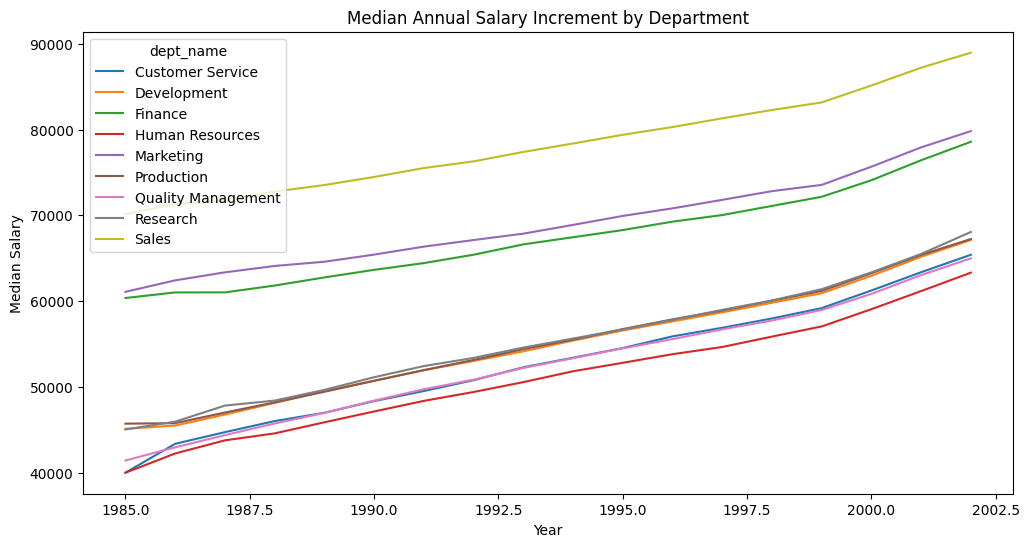

In [60]:
def median_salary_increment_by_department():
    connection = connect_to_db()

    query = """
        SELECT d.dept_name, s.amount, s.from_date
        FROM employees.department_employee de
        JOIN employees.salary s ON de.employee_id = s.employee_id
        JOIN employees.department d ON de.department_id = d.id
    """

    salary_df = pd.read_sql_query(query, connection)

    salary_df['year'] = pd.to_datetime(salary_df['from_date']).dt.year

    # Grouping by department and year, calculating the median salary
    median_salary_by_department = salary_df.groupby(['dept_name', 'year'])['amount'].median().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='year', y='amount', hue='dept_name', data=median_salary_by_department)
    plt.title('Median Annual Salary Increment by Department')
    plt.xlabel('Year')
    plt.ylabel('Median Salary')
    plt.show()

median_salary_increment_by_department()